ABOUT THE DATASET

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score



Loading dataset

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True,subset=['bmi'])

In [8]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2261,48246,Male,59.0,0,0,Yes,Private,Urban,60.35,25.9,formerly smoked,0
1588,15166,Female,75.0,1,0,Yes,Private,Urban,183.00,20.8,Unknown,0
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
3042,37096,Female,6.0,0,0,No,children,Rural,66.33,18.6,Unknown,0
5021,15517,Female,35.0,0,0,Yes,Private,Urban,81.90,24.5,never smoked,0
1181,782,Female,32.0,0,0,No,Private,Urban,79.34,26.5,formerly smoked,0
873,17245,Female,28.0,0,0,Yes,Private,Rural,87.01,39.9,never smoked,0
744,16685,Female,71.0,1,0,Yes,Private,Urban,194.62,31.6,never smoked,0
568,55138,Female,81.0,0,0,No,Self-employed,Urban,71.91,19.2,Unknown,0
4885,19165,Male,33.0,0,0,Yes,Private,Urban,83.12,23.4,Unknown,0


In [10]:
df.shape

(4909, 12)

In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
x=df.drop(labels=['id','ever_married','work_type','stroke'],axis=1).values
x[:,-1]

array(['formerly smoked', 'never smoked', 'smokes', ..., 'never smoked',
       'formerly smoked', 'Unknown'], dtype=object)

In [40]:
y=df['stroke'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Encoding

In [41]:
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])
x[:,4]=le.fit_transform(x[:,4])

In [42]:
ct=ColumnTransformer([('encoder',OneHotEncoder(),
                       [-1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [75]:
x[:,-1]

array([36.6, 32.5, 34.4, ..., 30.6, 25.6, 26.2], dtype=object)

Splitting the data

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [68]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Building Our Model

In [54]:
model=Sequential()

In [55]:
# hidden layer 1
model.add(layers.Dense(5,activation='relu'))

#hidden layer 2
model.add(layers.Dense(8,activation='relu'))

#hidden layer 3
model.add(layers.Dense(12,activation='relu'))

#hidden layer 4
model.add(layers.Dense(5,activation='relu'))

#output layer
model.add(layers.Dense(1,activation='sigmoid'))

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history=model.fit(x_train,y_train, batch_size=40, epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.9646 - val_loss: 0.2169 - val_accuracy: 0.9257
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9638 - val_loss: 0.2178 - val_accuracy: 0.9287
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9631 - val_loss: 0.2079 - val_accuracy: 0.9328
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.9651 - val_loss: 0.2106 - val_accuracy: 0.9318
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9636 - val_loss: 0.2146 - val_accuracy: 0.9277
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1151 - accuracy: 0.9631 - val_loss: 0.2148 - val_accuracy: 0.9338
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.9636 - val_loss: 0.2079 - val_accuracy: 0.9338
Epoch 8/100
9

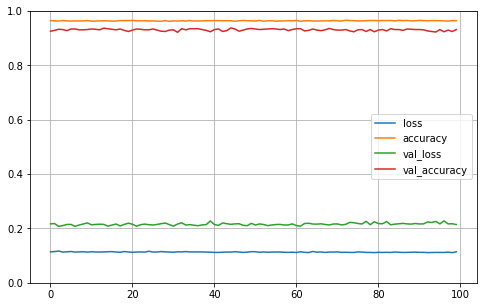

In [70]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
x_test[50]

array([ 1.45175581, -0.45266762, -0.75577775, -0.41115401, -0.85552463,
       -1.78243274, -0.3117799 , -0.22420388,  1.0081801 , -0.54342334,
       -1.29720243])

Testing data

In [76]:
y_pred=model.predict([[1.45175581, -0.45266762, -0.75577775, -0.41115401, -0.85552463,
       -1.78243274, -0.3117799 , -0.22420388,  1.0081801 , -0.54342334,
       -1.29720243]])
print(y_pred>0.5)

[[False]]


In [98]:
y_pred=model.predict(x_test)>0.5
y_act=y_test==1

In [128]:
y=[i for i in y_act]
y_pred=[i for i in y_pred]

In [129]:
cm=confusion_matrix(y,y_pred)
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [982, 1]

In [108]:
accuracy_score(y_test,y_pred)

0.9317718940936863